# 2022/01/11 Make Pipeline

#### Aim
create the audio pipeline

#### imports external modules

In [1]:
import pathlib
import sys
from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F


#### Get & Add the Path

In [2]:
current_dir: Path = pathlib.Path().cwd().resolve()
project_root: Path = current_dir.parent
data_dir: Path = project_root / "data"

sys.path.append(str(project_root))

#### Get the WAV file

In [3]:
audio_dir: Path = data_dir / "train" / "audio"
audio_file1: Path = audio_dir / "000315.wav"

#### WAV2Logmel2Tensor

spectrogram: torch.Size([8, 128, 1551])


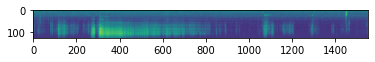

In [4]:
from corsmal_challenge.data.audio import load_wav


spectrogram = load_wav(audio_file1).generate_mel_spectrogram().log2()
print(f"spectrogram: {spectrogram.size()}")
plt.figure()
plt.imshow(spectrogram[0].numpy())
plt.show()

#### Get more files & create input tensor

spectrogram: torch.Size([8, 128, 285])
spectrogram: torch.Size([8, 128, 512])
spectrogram: torch.Size([8, 128, 760])
spectrogram: torch.Size([8, 128, 116])
spectrogram: torch.Size([8, 128, 422])
spectrogram: torch.Size([8, 128, 330])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  

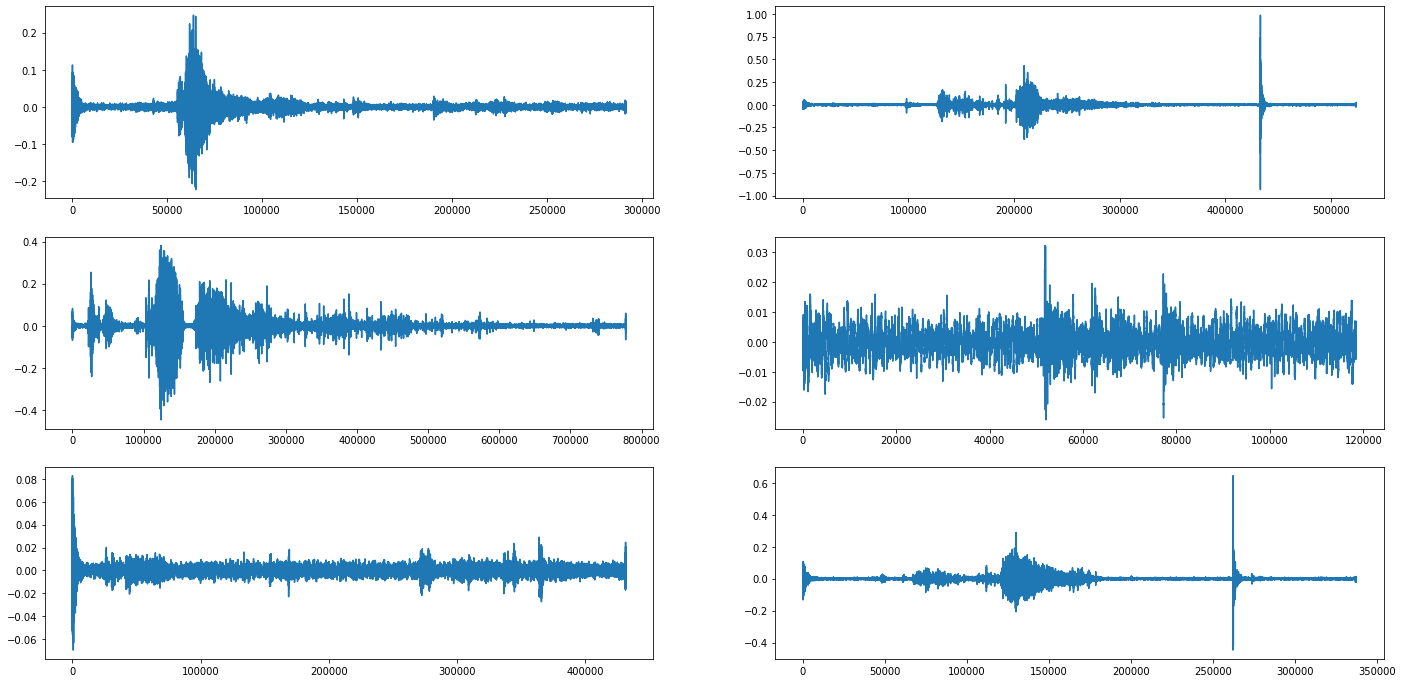

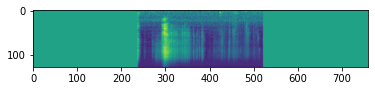

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

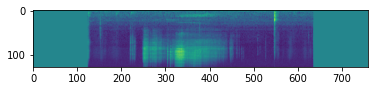

tensor([[[  1.7726,  -0.1664,  -0.2038,  ...,   1.4494,  -0.6688,  -1.2008],
         [  2.7091,   0.1411,   2.7943,  ...,   1.8474,   0.5109,   0.2317],
         [  2.2303,   0.4599,   2.9540,  ...,   1.4698,  -0.1362,   0.4178],
         ...,
         [ -4.8576,  -6.3577,  -9.0014,  ...,  -9.4408,  -9.4449,  -8.9874],
         [ -6.6644,  -8.1883, -10.0239,  ...,  -9.3219,  -9.7002,  -9.3054],
         [ -6.5641,  -8.5748,  -9.9298,  ...,  -9.7573, -10.0646, -10.1230]],

        [[  2.6919,   0.1433,   0.6015,  ...,   1.9029,  -0.4556,  -0.7700],
         [  3.3074,   0.5886,   3.1705,  ...,   2.3173,   0.8753,   0.8761],
         [  2.7307,   1.1766,   3.1625,  ...,   1.8256,  -0.0592,   1.4437],
         ...,
         [ -3.4708,  -5.2559,  -8.0646,  ...,  -9.1353,  -9.3911,  -8.5466],
         [ -4.3429,  -6.1235,  -8.5550,  ...,  -9.8756,  -9.2918,  -8.7584],
         [ -5.2418,  -7.7137,  -9.0165,  ...,  -9.8526,  -9.6596,  -9.3949]],

        [[  4.0788,   0.9524,   1.1112,  ...

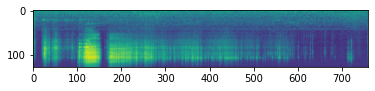

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

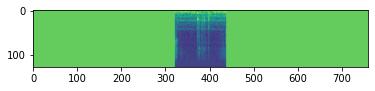

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

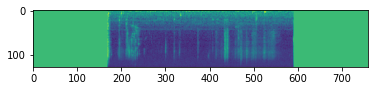

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

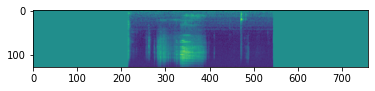

RuntimeError: stack expects each tensor to be equal size, but got [8, 128, 285] at entry 0 and [8, 128, 512] at entry 1

In [8]:
from corsmal_challenge.data.audio import Wav


filenames: List[Path] = [
    audio_dir / "000000.wav",
    audio_dir / "000010.wav",
    audio_dir / "000020.wav",
    audio_dir / "000001.wav",
    audio_dir / "000011.wav",
    audio_dir / "000021.wav",
]
wavs: List[Wav] = [load_wav(fname) for fname in filenames]
# # fix length of wav by padding start & end
# max_len = max([wav.sample_len for wav in wavs])
# for wav in wavs:
#     head_pad: int = (max_len - wav.sample_len) // 2
#     tail_pad: int = max_len - wav.sample_len - head_pad
#     print(wav.sample_len)
#     wav.padding(head_pad, tail_pad)

# show raw audio
plt.figure(figsize=[24, 12])
for i, wav in enumerate(wavs):
    plt.subplot(3, 2, i + 1)
    plt.plot(wav.wav_audio_data[0].numpy())


stack: List[torch.Tensor] = []

for fname in filenames:
    spec = load_wav(fname).generate_mel_spectrogram().log2()
    stack.append(spec)
    print(f"spectrogram: {spec.size()}")
    # plt.figure()
    # plt.imshow(spec[0].numpy())
    # plt.show()

max_len = max([tensor.shape[-1] for tensor in stack])
for tensor in stack:
    head_pad: int = (max_len - tensor.shape[-1]) // 2
    tail_pad: int = max_len - tensor.shape[-1] - head_pad
    tensor = F.pad(tensor, (head_pad, tail_pad), "constant", 0)
    plt.figure()
    plt.imshow(tensor[4].numpy())
    plt.show()

tensor: torch.Tensor = torch.stack(stack, dim=0).permute(0, 1, 3, 2)
print(f"tensor: {tensor.size()}")
